In [56]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, log_loss
from pyarrow import feather
os.chdir("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/heart_disease")


In [79]:
import matplotlib.style as style
style.available
style.use('classic')
#style.available

In [58]:
%%time
heart = pd.read_csv("processed.cleveland.data", header=None)
heart.columns = [ 'age', 'sex', 'cp', 'restbp',
                 'chol', 'fbs', 'restecg', 'thalach',
                 'exang', 'oldpeak', 'slope', 'ca',
                 'thal', 'hd']
heart = heart.to_feather("processed_cleveland.feather")
heart = feather.read_feather('processed_cleveland.feather')
heart

CPU times: user 14.5 ms, sys: 3.81 ms, total: 18.3 ms
Wall time: 15.4 ms


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [59]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [60]:
heart.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [61]:
heart.apply(np.unique)

age        [29.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 41....
sex                                               [0.0, 1.0]
cp                                      [1.0, 2.0, 3.0, 4.0]
restbp     [94.0, 100.0, 101.0, 102.0, 104.0, 105.0, 106....
chol       [126.0, 131.0, 141.0, 149.0, 157.0, 160.0, 164...
fbs                                               [0.0, 1.0]
restecg                                      [0.0, 1.0, 2.0]
thalach    [71.0, 88.0, 90.0, 95.0, 96.0, 97.0, 99.0, 103...
exang                                             [0.0, 1.0]
oldpeak    [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...
slope                                        [1.0, 2.0, 3.0]
ca                                   [0.0, 1.0, 2.0, 3.0, ?]
thal                                      [3.0, 6.0, 7.0, ?]
hd                                           [0, 1, 2, 3, 4]
dtype: object

In [62]:
heart[(heart.ca == "?") | (heart.thal == "?")]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [63]:
df = heart[(heart.ca != "?") & (heart.thal != "?")]
df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


## splitting the data into training and testing

In [80]:
X = df.drop(['hd'], axis = 1).copy()
y = df['hd'].copy()
df['hd'].unique()

'''we are only interested if someone has heart disease or not which is 0 or 1. 
   so we convert the types of all heart diesease to 1 '''

y_index = y > 0
y[y_index] = 1


## One Hot encoding
* **age, float**
* **sex - category**
    * 0 female
    * 1 male
* **cp, chest pain - category**
    * 1 typlical angina
    * 2 atypical angina
    * 3 non-anginal pain
    * 4 asymptomatic
* r**estbp, resting blood pressure (in mm Hg), float**
* **chol, serum choletrol in mg/dl, float**
* **fbs, fasting blood sugar, category**
    * 0 >= 120 mg/dl
    * 1 <= 120 mg/dl
* **restecg, resting electrocardiographic results, category**
    * 1 normal
    * 2 having ST-T wave
    * 3 showing probable or definite left ventricular hypertrophy
* **thalach, max heart rate, float**
* **exang, exercise induced angina, category**
    * 0 no
    * 1 yes
* **oldpeak, ST depression induced by exercise relative to rest, float**
* **slope, the slope of the peak exercise ST segement, category**
    * 1 upsloping
    * 2 flat
    * 3 downsloping
* **ca, number of major vessels(0-3) colored by fluroscopy float**
* *t*hal, thalium heart scan, category**
    * 3 normal
    * 6 fixed defect
    * 7 reversible defect

In [81]:
# Encoding categorical data
X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'], dtype=int)
X_encoded

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,...,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,...,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,...,1,1,0,0,0,1,0,0,0,1


## Primary Classification Model

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [89]:
plt.figure(figsize=(200,100))
plot_tree(dtc.fit(X_train, y_train),
         filled=True,
         rounded=True,
         class_names=["No heart disease", 'yes heart disease'],
         feature_names=X_encoded.columns)
plt.show()


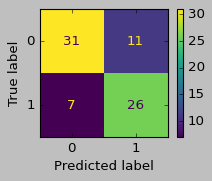

In [68]:
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(3,2))
cmp.plot(ax = ax)


In the confusion matrix, we see that of the $31+11 = 42$ people that does not have **Heart Disease** 31(74%) were correctly classified. And of the $7+26 = 33$ people that have **Heart Disease**, 26(79%) were correctly classified.

## Cost Complexity Pruning - Visualize Alpha
Decision Tress are notorious for being overfit to the Training Dataset and there are a lot of parameters like max_depth, min_samples that are designed to reduce overfitting, however, pruning a tree with **cost complexity pruning** can simplify the whole process of finding a small tree that improves the accuracy with the testing dataset.

pruning a decision tree is all about finding the right value for the pruning parameter, **alpha** which controls how little or how much pruning happends.

**NOTE:** we omit the max value for aplha wth ccp_aplhas = `ccp_aplhas[:-1]` because it would prune all leaves, leaving us with only a root instead of a tree.

In [69]:
path = dtc.cost_complexity_pruning_path(X_train, y_train) # determines the values for aplha
ccp_alphas = path.ccp_alphas # extract diff values of alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for i in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    dtc.fit(X_train, y_train)
    clf_dts.append(dtc)


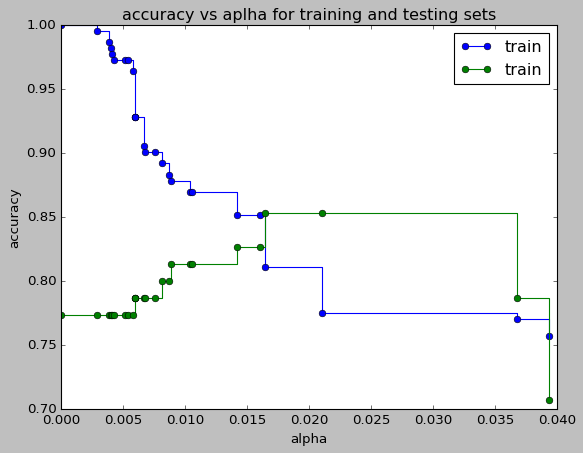

In [70]:
train_scores = [i.score(X_train, y_train) for i in clf_dts]
test_scores = [i.score(X_test, y_test) for i in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs aplha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='train', drawstyle='steps-post')
ax.legend()
plt.show()


#### In the graph above we see that the accuracy for the testing dataset hits its max value when alpha is about 0.016.


## Cost Complexity Pruning with cross validation

best score:  0.7477777777777778
best ccp_aplha:  0.014224751066856332


Text(0.5, 1.0, 'acc vs alpha for cross validation')

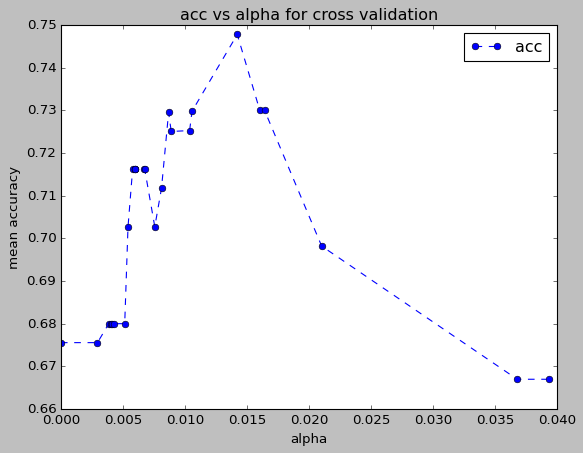

In [71]:
scores = []
scores_alpha = []
#kfold = KFold(n_splits=5, shuffle=True, random_state=23)
for i in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    score = cross_val_score(dtc, X_train, y_train, cv=5)
    scores.append(score.mean())
    scores_alpha.append([i, score.mean()])

i_max = np.argmax(scores)
print("best score: ", scores[i_max])
print("best ccp_aplha: ", ccp_alphas[i_max])

# Plot
scores_result = pd.DataFrame(scores_alpha, columns=['alpha', 'acc'])
scores_result.plot(x='alpha', y='acc', marker='o', linestyle='--')
plt.xlabel("alpha")
plt.ylabel("mean accuracy")
plt.title('acc vs alpha for cross validation')

## Building, Evaluating, Drawing Final Classification Tree

log loss score: 0.40325236288992217


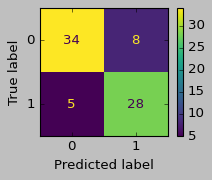

In [91]:
dtc_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[i_max])
dtc_pruned = dtc_pruned.fit(X_train, y_train)
y_pred = dtc_pruned.predict(X_test)
y_pred_prob = dtc_pruned.predict_proba(X_test)

fig, ax = plt.subplots(figsize=(3,2))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(ax=ax)
print("log loss score:",log_loss(y_test, y_pred_prob))


In the confusion matrix, we see that of the $34+8 = 42$ people that does not have **Heart Disease** 34(81%) were correctly classified. And of the $5+28 = 33$ people that have **Heart Disease**, 28(84.85%) were correctly classified.

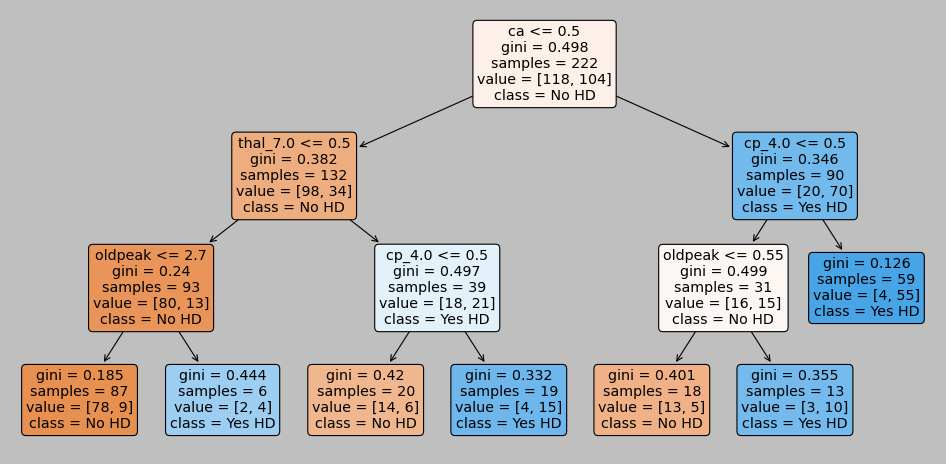

In [73]:
plt.figure(figsize=(15,7))
plot_tree(dtc_pruned.fit(X_train, y_tran),
                 filled=True,
                 rounded=True,
                 class_names=['No HD','Yes HD'],
                 feature_names=X_encoded.columns)
plt.show()

## Hyper Parameter tuning using StratifiedKFold

In [74]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
clf = DecisionTreeClassifier(random_state=23)
print(clf.get_params())
params ={'max_depth':[None,3,4,5,6,7], 'min_samples_split':[2,5,10,20],'min_samples_leaf':[1,5,10,20]}
gcv = GridSearchCV(clf, param_grid=params, verbose=3, cv=kfold, scoring='neg_log_loss')
gcv.fit(X_encoded,y)
print(gcv.best_params_)
print(gcv.best_score_)



{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 23, 'splitter': 'best'}
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-9.011 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-8.410 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-9.164 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-10.385 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-11.607 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-7.835 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_

[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-0.374 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-0.496 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-0.428 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-1.635 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-0.553 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-0.374 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-0.496 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-0.428 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-1.635 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-0.553 total time=   0.0s


[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=-3.462 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=-1.711 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-2.149 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-1.084 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-0.472 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-3.462 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-1.698 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-0.962 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-1.089 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-0.430 total time=

[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=20;, score=-1.506 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=20;, score=-1.078 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=20;, score=-0.995 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=20;, score=-2.892 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=20;, score=-2.203 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=-1.454 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=-3.246 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=-1.574 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=-4.518 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=-4.571 total time=   

[CV 4/5] END max_depth=6, min_samples_leaf=5, min_samples_split=2;, score=-3.921 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=5, min_samples_split=2;, score=-4.564 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=5, min_samples_split=5;, score=-1.441 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=5, min_samples_split=5;, score=-4.333 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=5, min_samples_split=5;, score=-2.141 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=5, min_samples_split=5;, score=-3.921 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=5, min_samples_split=5;, score=-4.564 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10;, score=-1.441 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10;, score=-4.333 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10;, score=-2.141 total time=   0.

[CV 3/5] END max_depth=7, min_samples_leaf=5, min_samples_split=5;, score=-2.141 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=5, min_samples_split=5;, score=-3.921 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=5, min_samples_split=5;, score=-4.564 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=5, min_samples_split=10;, score=-1.441 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=5, min_samples_split=10;, score=-4.333 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=5, min_samples_split=10;, score=-2.141 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=5, min_samples_split=10;, score=-3.921 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=5, min_samples_split=10;, score=-4.564 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=5, min_samples_split=20;, score=-0.918 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=5, min_samples_split=20;, score=-1.081 total time= 

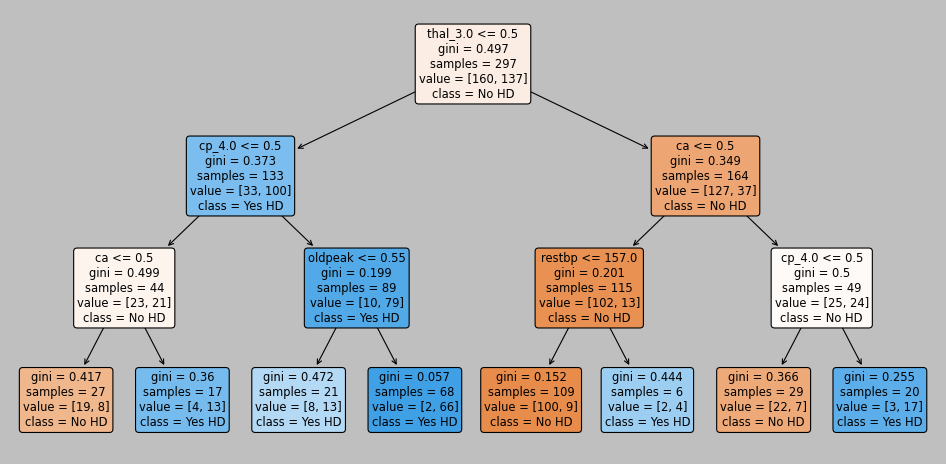

In [75]:
best_clf = gcv.best_estimator_
plt.figure(figsize=(15,7))
plot_tree(best_clf.fit(X_encoded,y),
                 filled=True,
                 rounded=True,
                 class_names=['No HD','Yes HD'],
                 feature_names=X_encoded.columns)
plt.show()

## Feature importance plot for decision tree classifier

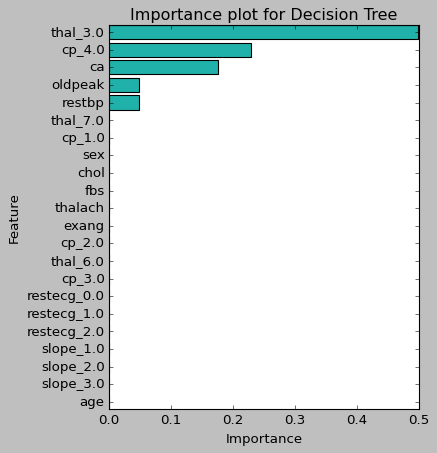

In [76]:
imp = best_clf.feature_importances_
cols = list(X_encoded.columns)
imp_df = pd.DataFrame({'feature':cols, 'importance':imp})
imp_df.sort_values(by='importance', inplace=True)

plt.figure(figsize=(5,6))
plt.barh(imp_df['feature'], imp_df['importance'], color='lightseagreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Importance plot for Decision Tree")
plt.show()

## Random Forest Classifier

In [77]:
rf = RandomForestClassifier(random_state=23)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
params = {'max_features':[2,3,4,5,6,7]}
gcv_rf = GridSearchCV(rf, param_grid=params, verbose=3, cv=kfold, scoring='neg_log_loss')
gcv_rf.fit(X_encoded,y)
print(gcv_rf.best_params_)
print(gcv_rf.best_score_)
best_clf = gcv_rf.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................max_features=2;, score=-0.351 total time=   0.1s
[CV 2/5] END ...................max_features=2;, score=-0.375 total time=   0.1s
[CV 3/5] END ...................max_features=2;, score=-0.379 total time=   0.1s
[CV 4/5] END ...................max_features=2;, score=-0.457 total time=   0.1s
[CV 5/5] END ...................max_features=2;, score=-0.386 total time=   0.1s
[CV 1/5] END ...................max_features=3;, score=-0.340 total time=   0.1s
[CV 2/5] END ...................max_features=3;, score=-0.371 total time=   0.1s
[CV 3/5] END ...................max_features=3;, score=-0.368 total time=   0.1s
[CV 4/5] END ...................max_features=3;, score=-0.479 total time=   0.1s
[CV 5/5] END ...................max_features=3;, score=-0.392 total time=   0.1s
[CV 1/5] END ...................max_features=4;, score=-0.348 total time=   0.1s
[CV 2/5] END ...................max_features=4;, 

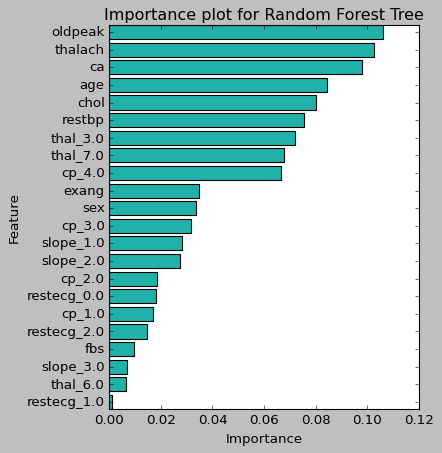

In [78]:
imp = best_clf.feature_importances_
cols = list(X_encoded.columns)
imp_df = pd.DataFrame({'feature':cols, 'importance':imp})
imp_df.sort_values(by='importance', inplace=True)

plt.figure(figsize=(5,6))
plt.barh(imp_df['feature'], imp_df['importance'], color='lightseagreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Importance plot for Random Forest Tree")
plt.show()